# Fin Vol Functions - SSVI Model

We examine the Gatheral SVI and SSVI Functions following
https://wwwf.imperial.ac.uk/~ajacquie/IC_AMDP/IC_AMDP_Docs/Code/SSVI.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.utils import *
from financepy.models.volatility_fns import *

## SSI Model Volatility Smile

Set the forward price

In [4]:
f = 100.0

I shift the volatility curve by 0.8%  to the left

In [5]:
strikes = np.linspace(36.0, 300.0, 100)

In [6]:
logMoneyness = np.log(f/strikes)

In [7]:
a, b, rho, m, sigma = 0.030358, 0.0503815, -0.1, 0.3, 0.048922

In [8]:
t = 1.0

In [9]:
params_1 = np.array([a, b, rho, m, sigma])

In [10]:
volSSI_1 = []
for k in strikes:
    volSSI_1.append(vol_function_svi(params_1, f, k, t))

In [11]:
params_2 = np.array([a, b, rho, m, 3.0*sigma])

In [12]:
volSSI_2 = []
for k in strikes:
    volSSI_2.append(vol_function_svi(params_2, f, k, t))

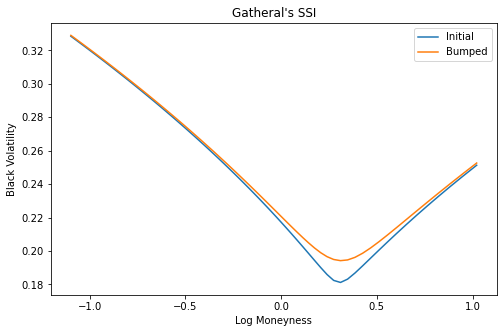

In [13]:
plt.figure(figsize=(8,5))
plt.plot(logMoneyness, volSSI_1, label="Initial")
plt.plot(logMoneyness, volSSI_2, label="Bumped")
plt.title("Gatheral's SSI")
plt.xlabel("Log Moneyness")
plt.ylabel("Black Volatility")
plt.legend()

## Surface SVI

We now build the surface SSVI due to Gatheral and Jacquier

In [14]:
f = 100.0

In [15]:
sigma, gamma, rho = 0.2, 0.8, -0.7

In [16]:
print("Consistency check to avoid static arbitrage: ", (gamma - 0.25 * (1. + np.abs(rho)) > 0))

Consistency check to avoid static arbitrage:  True


In [17]:
params = np.array([gamma, sigma, rho])

In [18]:
XX, TT = np.linspace(-1., 1., 50), np.linspace(0.001, 5., 50)

In [20]:
localVarianceSSVI = np.array([[ssvi_local_varg(x, gamma, sigma, rho, t) for x in XX] for t in TT])

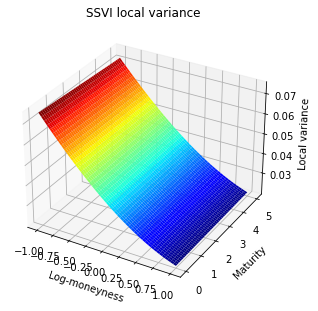

In [21]:
fig = plt.figure(figsize=(8, 5))
ax = fig.gca(projection="3d")
XXX, TTT = np.meshgrid(XX, TT)
ax.plot_surface(XXX, TTT, localVarianceSSVI,
cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel("Log-moneyness")
ax.set_ylabel("Maturity")
ax.set_zlabel("Local variance")
ax.set_title("SSVI local variance")
plt.show()

In [22]:
params = np.array([gamma, sigma, rho])

In [25]:
blackVolSSVI = np.array([[100.0 * vol_function_ssvi(params, f, k, t) for k in strikes] for t in TT]);

0.8 0.14123515047299998 -0.7 100.0 1.0216512475319812 0.14123515047299998
0.8 0.14411225103248482 -0.7 100.0 0.9501922835498364 0.14411225103248482
0.8 0.14701585801051004 -0.7 100.0 0.8835009090511642 0.14701585801051004
0.8 0.14992039702223653 -0.7 100.0 0.8209805520698303 0.14992039702223653
0.8 0.15280718213711636 -0.7 100.0 0.7621400520468967 0.15280718213711636
0.8 0.15566269158888618 -0.7 100.0 0.7065702008920861 0.15566269158888618
0.8 0.1584772797716305 -0.7 100.0 0.653926467406664 0.1584772797716305
0.8 0.16124421301992636 -0.7 100.0 0.6039160468320027 0.16124421301992636
0.8 0.1639589459851032 -0.7 100.0 0.5562879978427482 0.1639589459851032
0.8 0.16661857711968678 -0.7 100.0 0.5108256237659907 0.16661857711968678
0.8 0.16922143781540122 -0.7 100.0 0.46734051182625186 0.16922143781540122
0.8 0.171766781560501 -0.7 100.0 0.42566781542568394 0.171766781560501
0.8 0.17425454818473168 -0.7 100.0 0.38566248081198473 0.17425454818473168
0.8 0.17668518466570918 -0.7 100.0 0.3471961

0.8 0.25802592465609026 -0.7 100.0 -0.8005056988804445 0.25802592465609026
0.8 0.25890254896068066 -0.7 100.0 -0.8124106013867629 0.25890254896068066
0.8 0.2597687883142307 -0.7 100.0 -0.8241754429663495 0.2597687883142307
0.8 0.2606248711268949 -0.7 100.0 -0.8358034809614685 0.2606248711268949
0.8 0.2614710186288099 -0.7 100.0 -0.8472978603872036 0.2614710186288099
0.8 0.2623074451576448 -0.7 100.0 -0.8586616190375187 0.2623074451576448
0.8 0.26313435843264943 -0.7 100.0 -0.8698976923044446 0.26313435843264943
0.8 0.26395195981600417 -0.7 100.0 -0.8810089177295152 0.26395195981600417
0.8 0.26476044456115955 -0.7 100.0 -0.8919980393051105 0.26476044456115955
0.8 0.2655600020504736 -0.7 100.0 -0.9028677115420143 0.2655600020504736
0.8 0.26635081602098526 -0.7 100.0 -0.913620503318276 0.26635081602098526
0.8 0.26713306478022825 -0.7 100.0 -0.924258901523332 0.26713306478022825
0.8 0.2679069214120148 -0.7 100.0 -0.9347853145103193 0.2679069214120148
0.8 0.268672553972556 -0.7 100.0 -0.945

0.8 0.2195240980244339 -0.7 100.0 -0.2776317365982795 0.2195240980244339
0.8 0.22095527708269244 -0.7 100.0 -0.2976324033049489 0.22095527708269244
0.8 0.2223607620301052 -0.7 100.0 -0.3172408746933252 0.2223607620301052
0.8 0.22374136668903427 -0.7 100.0 -0.3364722366212129 0.22374136668903427
0.8 0.2250978708175677 -0.7 100.0 -0.3553407209255956 0.2250978708175677
0.8 0.2264310216642737 -0.7 100.0 -0.3738597686928331 0.2264310216642737
0.8 0.22774153547428183 -0.7 100.0 -0.39204208777602373 0.22774153547428183
0.8 0.22903009893961127 -0.7 100.0 -0.4098997051760301 0.22903009893961127
0.8 0.23029737059032504 -0.7 100.0 -0.42744401482693944 0.23029737059032504
0.8 0.231543982130771 -0.7 100.0 -0.44468582126144557 0.231543982130771
0.8 0.2327705397118727 -0.7 100.0 -0.4616353795752188 0.2327705397118727
0.8 0.23397762514838027 -0.7 100.0 -0.47830243206043055 0.23397762514838027
0.8 0.2351657970771237 -0.7 100.0 -0.49469624183610705 0.2351657970771237
0.8 0.23633559205829413 -0.7 100.0 -

0.8 0.269449117272527 -0.7 100.0 -0.9758167111881819 0.269449117272527
0.8 0.270168179554389 -0.7 100.0 -0.9858167945227653 0.270168179554389
0.8 0.2708799492043197 -0.7 100.0 -0.9957178655054768 0.2708799492043197
0.8 0.2715845647547463 -0.7 100.0 -1.0055218656020977 0.2715845647547463
0.8 0.2722821609407337 -0.7 100.0 -1.0152306797290587 0.2722821609407337
0.8 0.27297286883448973 -0.7 100.0 -1.0248461384285004 0.27297286883448973
0.8 0.2736568159728872 -0.7 100.0 -1.034370019939756 0.2736568159728872
0.8 0.2743341264810189 -0.7 100.0 -1.0438040521731147 0.2743341264810189
0.8 0.2750049211899067 -0.7 100.0 -1.053149914591352 0.2750049211899067
0.8 0.2756693177505929 -0.7 100.0 -1.0624092400041492 0.2756693177505929
0.8 0.2763274307407282 -0.7 100.0 -1.0715836162801904 0.2763274307407282
0.8 0.2769793717695719 -0.7 100.0 -1.0806745879814421 0.2769793717695719
0.8 0.27762524957814666 -0.7 100.0 -1.0896836579238083 0.27762524957814666
0.8 0.27826517013229163 -0.7 100.0 -1.098612288668109

0.8 0.21909993004243614 -0.7 100.0 -0.2776317365982795 0.21909993004243614
0.8 0.22049950943447397 -0.7 100.0 -0.2976324033049489 0.22049950943447397
0.8 0.22187391586217328 -0.7 100.0 -0.3172408746933252 0.22187391586217328
0.8 0.22322395140268717 -0.7 100.0 -0.3364722366212129 0.22322395140268717
0.8 0.22455038410943884 -0.7 100.0 -0.3553407209255956 0.22455038410943884
0.8 0.22585394962043207 -0.7 100.0 -0.3738597686928331 0.22585394962043207
0.8 0.22713535270033808 -0.7 100.0 -0.39204208777602373 0.22713535270033808
0.8 0.22839526872634333 -0.7 100.0 -0.4098997051760301 0.22839526872634333
0.8 0.22963434510461303 -0.7 100.0 -0.42744401482693944 0.22963434510461303
0.8 0.23085320262407663 -0.7 100.0 -0.44468582126144557 0.23085320262407663
0.8 0.23205243674651593 -0.7 100.0 -0.4616353795752188 0.23205243674651593
0.8 0.23323261883250127 -0.7 100.0 -0.47830243206043055 0.23323261883250127
0.8 0.23439429731019087 -0.7 100.0 -0.49469624183610705 0.23439429731019087
0.8 0.23553799877993

0.8 0.26792072527667943 -0.7 100.0 -0.9758167111881819 0.26792072527667943
0.8 0.26862389244653223 -0.7 100.0 -0.9858167945227653 0.26862389244653223
0.8 0.2693199337206801 -0.7 100.0 -0.9957178655054768 0.2693199337206801
0.8 0.27000898449463945 -0.7 100.0 -1.0055218656020977 0.27000898449463945
0.8 0.2706911764469633 -0.7 100.0 -1.0152306797290587 0.2706911764469633
0.8 0.27136663767516134 -0.7 100.0 -1.0248461384285004 0.27136663767516134
0.8 0.2720354928159376 -0.7 100.0 -1.034370019939756 0.2720354928159376
0.8 0.2726978631698629 -0.7 100.0 -1.0438040521731147 0.2726978631698629
0.8 0.2733538668160031 -0.7 100.0 -1.053149914591352 0.2733538668160031
0.8 0.2740036187209019 -0.7 100.0 -1.0624092400041492 0.2740036187209019
0.8 0.27464723084837106 -0.7 100.0 -1.0715836162801904 0.27464723084837106
0.8 0.2752848122585988 -0.7 100.0 -1.0806745879814421 0.2752848122585988
0.8 0.2759164692050675 -0.7 100.0 -1.0896836579238083 0.2759164692050675
0.8 0.27654230522996787 -0.7 100.0 -1.09861

0.8 0.2186930689879603 -0.7 100.0 -0.2776317365982795 0.2186930689879603
0.8 0.2200619639493899 -0.7 100.0 -0.2976324033049489 0.2200619639493899
0.8 0.22140619326588748 -0.7 100.0 -0.3172408746933252 0.22140619326588748
0.8 0.22272654738562844 -0.7 100.0 -0.3364722366212129 0.22272654738562844
0.8 0.22402378280347293 -0.7 100.0 -0.3553407209255956 0.22402378280347293
0.8 0.22529862371278775 -0.7 100.0 -0.3738597686928331 0.22529862371278775
0.8 0.2265517635863161 -0.7 100.0 -0.39204208777602373 0.2265517635863161
0.8 0.22778386668547024 -0.7 100.0 -0.4098997051760301 0.22778386668547024
0.8 0.2289955695068362 -0.7 100.0 -0.42744401482693944 0.2289955695068362
0.8 0.2301874821437704 -0.7 100.0 -0.44468582126144557 0.2301874821437704
0.8 0.2313601895959494 -0.7 100.0 -0.4616353795752188 0.2313601895959494
0.8 0.23251425300348505 -0.7 100.0 -0.47830243206043055 0.23251425300348505
0.8 0.23365021081948897 -0.7 100.0 -0.49469624183610705 0.23365021081948897
0.8 0.2347685799197019 -0.7 100.

0.8 0.23550869276029876 -0.7 100.0 -0.5266989729222807 0.23550869276029876
0.8 0.23658212719859237 -0.7 100.0 -0.5423242908253616 0.23658212719859237
0.8 0.23763956898745855 -0.7 100.0 -0.5577092096648409 0.23763956898745855
0.8 0.23868145468471372 -0.7 100.0 -0.5728610146854433 0.23868145468471372
0.8 0.23970820411544871 -0.7 100.0 -0.587786664902119 0.23970820411544871
0.8 0.24072022116586023 -0.7 100.0 -0.6024928122918145 0.24072022116586023
0.8 0.24171789453928308 -0.7 100.0 -0.6169858195943811 0.24171789453928308
0.8 0.2427015984677272 -0.7 100.0 -0.6312717768418579 0.2427015984677272
0.8 0.24367169338687902 -0.7 100.0 -0.6453565167235968 0.24367169338687902
0.8 0.24462852657440287 -0.7 100.0 -0.6592456288842639 0.24462852657440287
0.8 0.24557243275448015 -0.7 100.0 -0.6729444732424258 0.24557243275448015
0.8 0.2465037346644162 -0.7 100.0 -0.6864581924091486 0.2465037346644162
0.8 0.24742274360358324 -0.7 100.0 -0.6997917232786138 0.24742274360358324
0.8 0.24832975993860357 -0.7 1

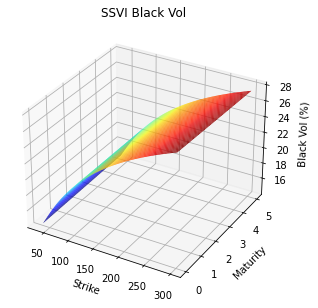

In [24]:
fig = plt.figure(figsize=(8, 5))
ax = fig.gca(projection="3d")
xxx, TTT = np.meshgrid(strikes, TT)
ax.plot_surface(xxx, TTT, blackVolSSVI,
cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.set_xlabel("Strike")
ax.set_ylabel("Maturity")
ax.set_zlabel("Black Vol (%)")
ax.set_title("SSVI Black Vol")
plt.show()

Copyright (c) 2020 Dominic O'Kane